<a href="https://colab.research.google.com/github/Alanalfachrizzy/tumor/blob/main/brain_tumor_classification_with_simple_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!wget --no-check-certificate \
  https://github.com/Alanalfachrizzy/tumor/raw/main/dataset.zip \
  -O /tmp/dataset.zip

--2023-01-14 08:04:34--  https://github.com/Alanalfachrizzy/tumor/raw/main/dataset.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alanalfachrizzy/tumor/main/dataset.zip [following]
--2023-01-14 08:04:34--  https://raw.githubusercontent.com/Alanalfachrizzy/tumor/main/dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9424336 (9.0M) [application/zip]
Saving to: ‘/tmp/dataset.zip’

/tmp/dataset.zip    100%[===================>]   8.99M  --.-KB/s    in 0.04s   

2023-01-14 08:04:34 (219 MB/s) - ‘/tmp/dataset.zip’ saved [9424336/9424336]



In [17]:
import zipfile,os

local_zip = '/tmp/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/input')
zip_ref.close()

In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/tmp/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/tmp/input/Brain_tumor_images/Normal/Normal (155).jpg
/tmp/input/Brain_tumor_images/Normal/Normal (131).jpg
/tmp/input/Brain_tumor_images/Normal/Normal (117).jpg
/tmp/input/Brain_tumor_images/Normal/Normal (25).jpg
/tmp/input/Brain_tumor_images/Normal/Normal (104).jpg
/tmp/input/Brain_tumor_images/Normal/Normal (55).jpg
/tmp/input/Brain_tumor_images/Normal/Normal (69).jpg
/tmp/input/Brain_tumor_images/Normal/Normal (114).jpg
/tmp/input/Brain_tumor_images/Normal/Normal (14).jpg
/tmp/input/Brain_tumor_images/Normal/Normal (168).jpg
/tmp/input/Brain_tumor_images/Normal/Normal (68).jpg
/tmp/input/Brain_tumor_images/Normal/Normal (90).jpg
/tmp/input/Brain_tumor_images/Normal/Normal (65).jpg
/tmp/input/Brain_tumor_images/Normal/Normal (169).jpg
/tmp/input/Brain_tumor_images/Normal/Normal (6).jpg
/tmp/input/Brain_tumor_images/Normal/Normal (158).jpg
/tmp/input/Brain_tumor_images/Normal/Normal (163).jpg
/tmp/input/Brain_tumor_images/Normal/Normal (84).jpg
/tmp/input/Brain_tumor_images/Normal/N

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [20]:
gen = ImageDataGenerator(rescale=1./255,validation_split = 0.2,zoom_range=(0.99,0.99))

In [21]:
train = gen.flow_from_directory("/tmp/input/Brain_tumor_images/",
                               target_size = (150,150),
                               batch_size = 256,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "training")

Found 320 images belonging to 2 classes.


In [22]:
val = gen.flow_from_directory("/tmp/input/Brain_tumor_images/",
                               target_size = (150,150),
                               batch_size = 8,
                               class_mode = "binary",
                               color_mode = "rgb",
                               shuffle = True,
                               seed = 123,
                               subset = "validation")
classes = val.class_indices

Found 80 images belonging to 2 classes.


# With grayscale as color mode we get high spikes in validation loss in training and substantially lower accuracy compared with a dataset with rgb color mode.

In [23]:
classes

{'Normal': 0, 'Tumor': 1}

In [24]:
import seaborn as sns

# Class distribution in training dataset

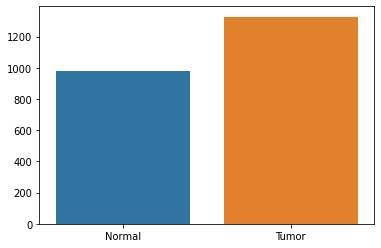

In [26]:
t=0
h=0
for i in range(15):
    a, b = next(train)
    for j in b:
        if j == 1:
            h+=1
        else:t+=1

sns.barplot(x=['Normal','Tumor'],y=[t,h])
    

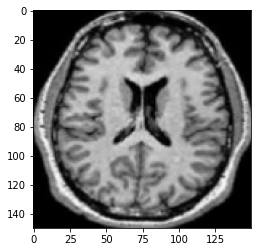

In [27]:
import matplotlib.pyplot as plt
batch = next(train)

plt.imshow(batch[0][0])

# Simple cnn

In [28]:
from keras.layers import Conv2D, MaxPool2D, LeakyReLU, BatchNormalization, Dropout, Dense, InputLayer, Flatten
from keras.losses import BinaryCrossentropy
from keras.optimizers import Adam

In [29]:
model = keras.Sequential()
model.add(InputLayer(input_shape=(150,150,3)))
model.add(Conv2D(filters=32,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())
model.add(Conv2D(filters=64,kernel_size=3, activation="relu", padding="same"))
model.add(MaxPool2D())


model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(rate=0.3))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer=Adam(0.001),loss = BinaryCrossentropy(),metrics=['accuracy'])


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

# Model plot

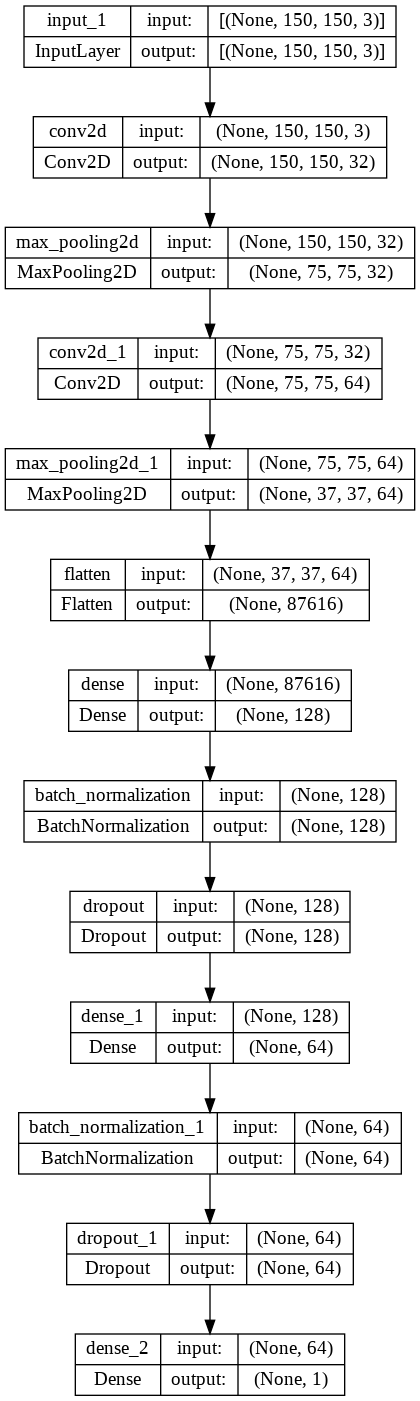

In [31]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True,
    show_layer_names=True,
)

In [32]:
from keras import utils, callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", 
                                        patience=5, restore_best_weights = True)

In [33]:
history = model.fit(train,verbose=1,callbacks = [earlystopping],epochs=20,validation_data=(val))

Epoch 1/20
2/2 [==============================] - 12s 3s/step - loss: 0.9858 - accuracy: 0.4781 - val_loss: 2.0067 - val_accuracy: 0.5750
Epoch 2/20
2/2 [==============================] - 10s 3s/step - loss: 0.5942 - accuracy: 0.7344 - val_loss: 1.9943 - val_accuracy: 0.5750
Epoch 3/20
2/2 [==============================] - 11s 8s/step - loss: 0.4709 - accuracy: 0.7844 - val_loss: 1.3643 - val_accuracy: 0.5750
Epoch 4/20
2/2 [==============================] - 10s 3s/step - loss: 0.4443 - accuracy: 0.7906 - val_loss: 0.9587 - val_accuracy: 0.5750
Epoch 5/20
2/2 [==============================] - 10s 3s/step - loss: 0.3571 - accuracy: 0.8594 - val_loss: 0.9228 - val_accuracy: 0.5750
Epoch 6/20
2/2 [==============================] - 10s 3s/step - loss: 0.3091 - accuracy: 0.8750 - val_loss: 0.9130 - val_accuracy: 0.5875
Epoch 7/20
2/2 [==============================] - 10s 7s/step - loss: 0.2316 - accuracy: 0.9187 - val_loss: 0.6658 - val_accuracy: 0.6750
Epoch 8/20
2/2 [==================

# Plotting accuracy

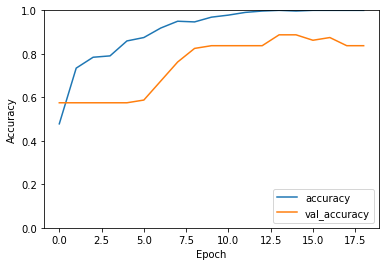

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Plotting loss

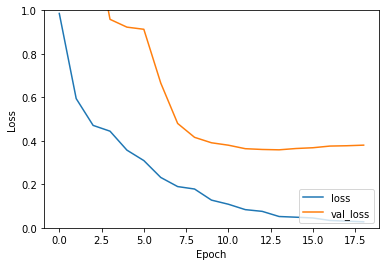

In [35]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Next step: Actually create a test set!
# This model will be sufficient for this task, so no need for a bigger model.